# ИИ. Рабочая тетрадь 6
## Ким Кирилл Сергеевич ИМБО-01-22

# 1.1. Теоретический материал

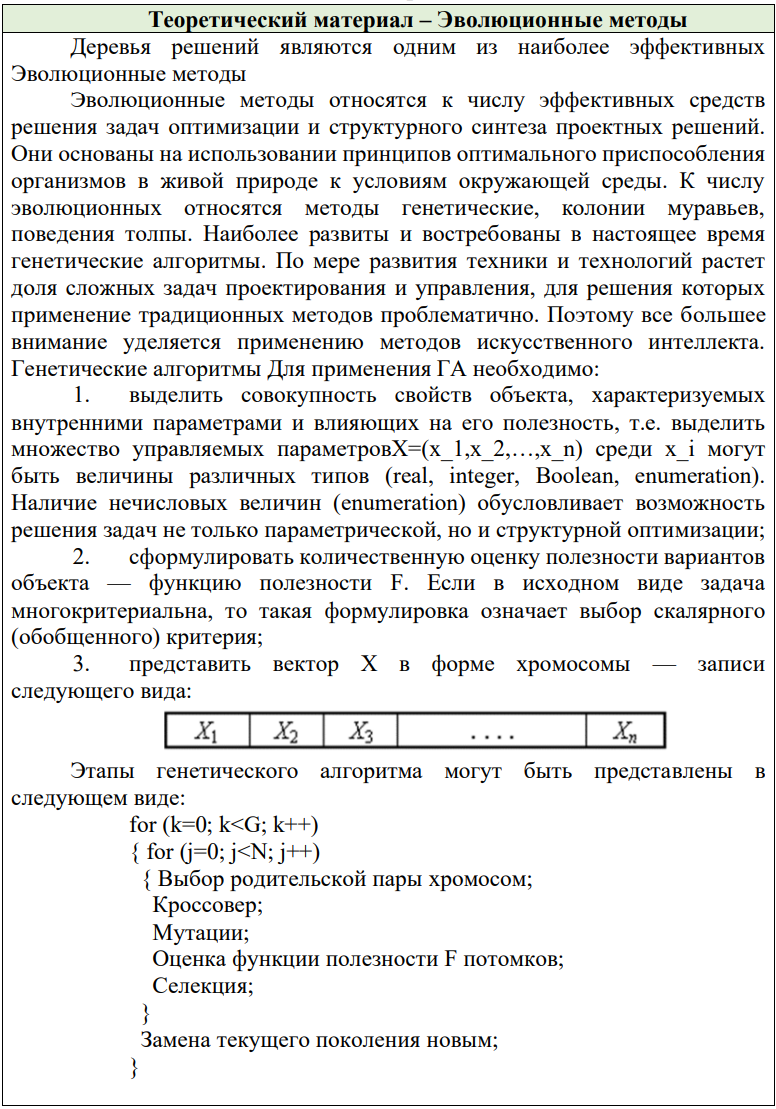

# 1.1.1. Пример

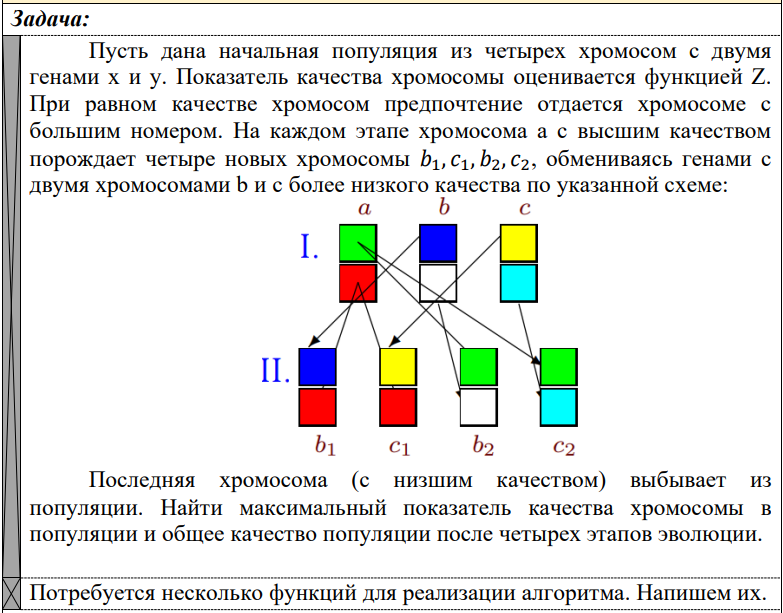

In [ ]:
# функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

In [ ]:
# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

In [ ]:
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

In [ ]:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])

    return sortedId

In [ ]:
# шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

In [ ]:
# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum=4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

In [ ]:
# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

In [ ]:
# Реализация алгоритма
results = evoSteps(X, Y)

In [ ]:
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:      {max(qualityArrZ)}') 

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:      1.0


# Задание

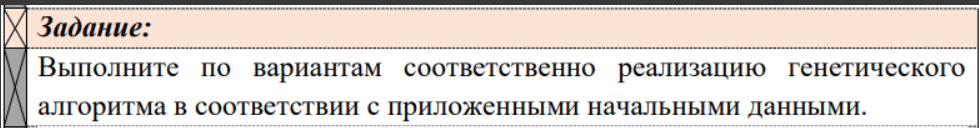

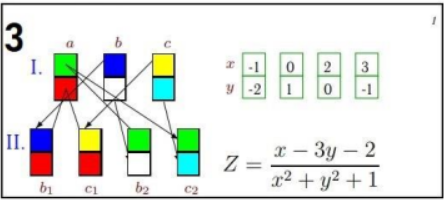

In [1]:
# 3
# функция качества хромосомы
def qZ(x,y):
    return (x - 3 * y - 2) / (x ** 2 + y ** 2 + 1)

In [2]:
# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

In [3]:
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

In [4]:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])

    return sortedId

In [5]:
# шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

In [6]:
# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum=4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

In [7]:
# объявление массивов хромосом
X = [-1, 0, 2, 3]
Y = [-2, 1, 0, -1]

In [8]:
# реализация алгоритма
results = evoSteps(X, Y)

In [9]:
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}') # максимальный показатель каждого хромосома в популяции

qualityArrZ = []

for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}') # общее качество популяции после четырех этапов эволюции

max_1_step: -1.6363636363636362
max_2_step: -0.3333333333333335
max_3_step: 2.1666666666666665
max_4_step: 2.333333333333333
max Z: 0.6666666666666666


# 1.2. Теоретический материал

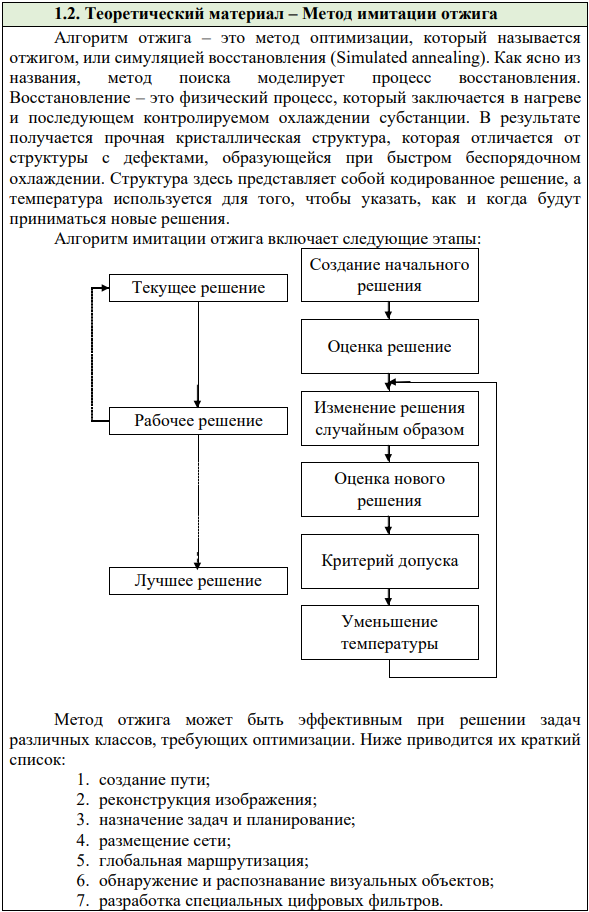

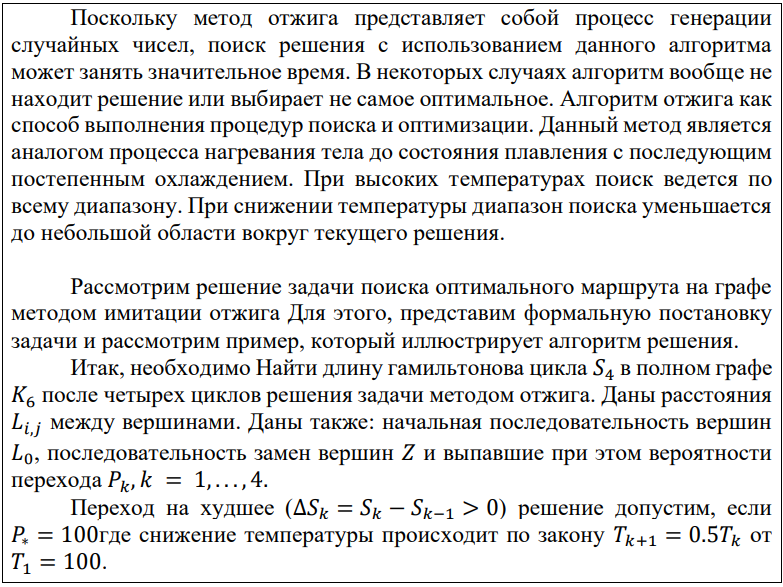

# 1.2.1 Пример

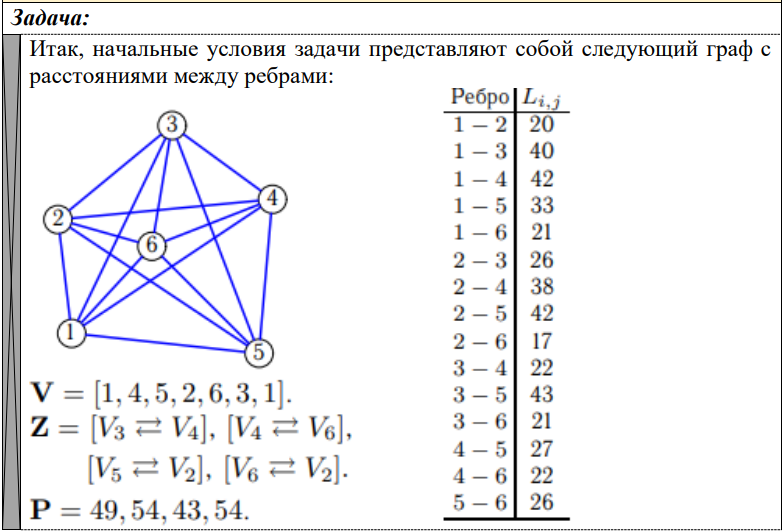

In [ ]:
import networkx as nx
from math import e

In [ ]:
distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26)] # длины рёбер

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

In [ ]:
# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)


# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

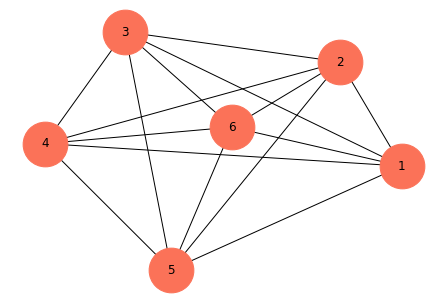

In [ ]:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

In [ ]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [ ]:
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

In [ ]:
# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

In [ ]:
# перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [ ]:
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if (deltaS > 0):
            p = probability(deltaS, T) # подсчёт вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if (p > P[i]):
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        Y = reductTemp(T) # вычисление температуры

    return V, arrSum

In [ ]:
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] # перенос, писать в строчку
                or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]):
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 5, 2, 3, 4, 6, 1]
Длина лучшего выбранного маршрута: 166
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


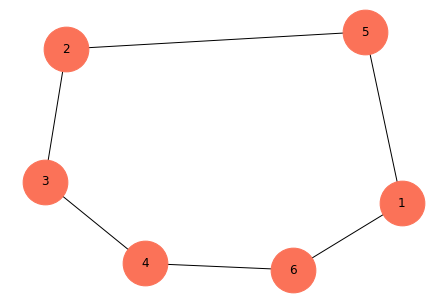

In [ ]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

# Задание

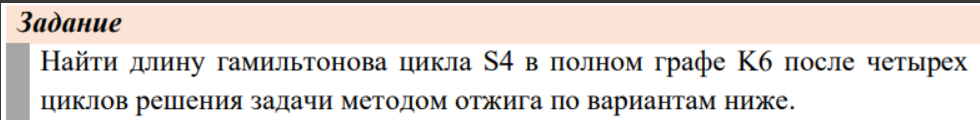

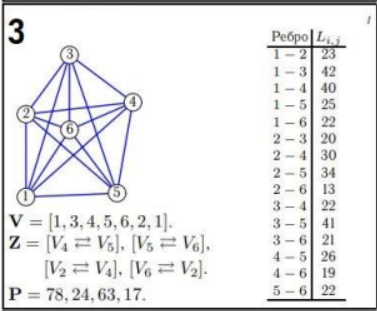

In [ ]:
import networkx as nx
from math import e

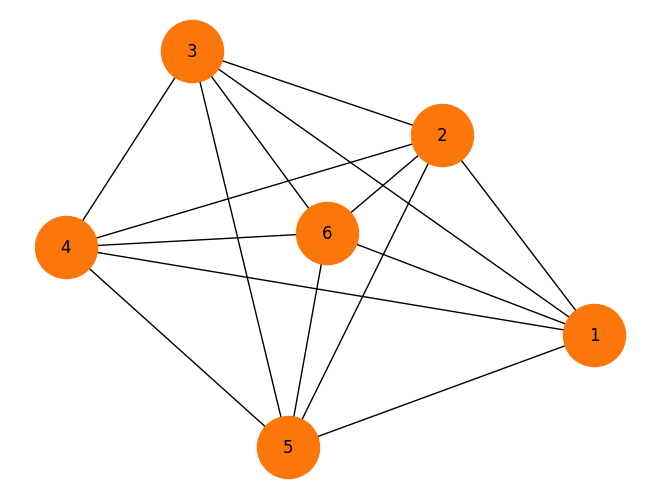

In [ ]:
# 3
distances = [(1, 2, 23),
            (1, 3, 42),
            (1, 4, 40),
            (1, 5, 25),
            (1, 6, 22),
            (2, 3, 20),
            (2, 4, 30),
            (2, 5, 34),
            (2, 6, 13),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 26),
            (4, 6, 19),
            (5, 6, 22)] # длины ребер

V = [1, 3, 4, 5, 6, 2, 1] # последовательность прохождения маршрута
Z = [(4, 5),
     (5, 6),
     (2, 4),
     (6, 2)] # последовательность замен вершин
P = [78, 24, 63, 17] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура

graph = nx.Graph() #создание пустого графа
graph.add_weighted_edges_from(distances) #добавление весов ребер

#отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fc7709', node_size=2000, with_labels=True)

In [ ]:
# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)


# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

In [ ]:
# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [ ]:
# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

In [ ]:
# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

In [ ]:
# перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [ ]:
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if (deltaS > 0):
            p = probability(deltaS, T) # подсчёт вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if (p > P[i]):
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        Y = reductTemp(T) # вычисление температуры

    return V, arrSum

In [ ]:
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] # перенос, писать в строчку
                or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]):
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранный маршрут: [1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута: 128
Длины всех рассмотренных маршрутов: [148, 162, 155, 142, 128]


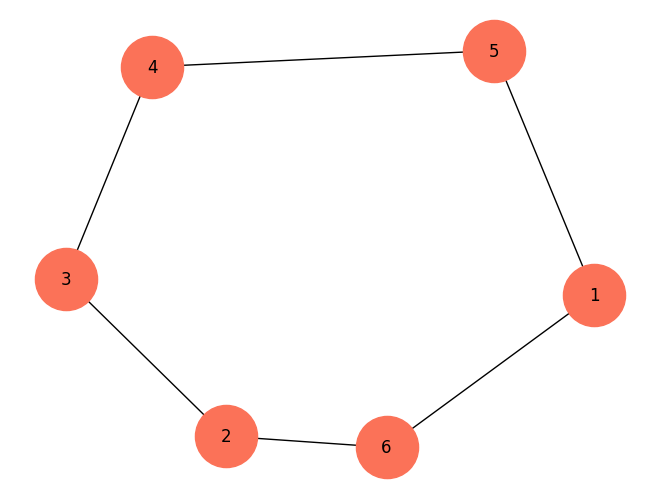

In [ ]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута